In [1]:
import plainEnglishCoding
import pprint,sympy
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt
import matplotlib,sympy
import ipywidgets as widgets

https://en.wikipedia.org/wiki/Ordinary_least_squares 

# Failure to Backsolve

In the previous module, we discussed using backsolving  

$
    M\cdot\vec{p}=\vec{c}
$

where the matrix $M$ and vector $\vec{c}$ are known but $\vec{p}$ is unknown.

This process effectively finds the inverse matrix, $M^{-1}$, which acts on $\vec{c}$ to find $\vec{p}$:

$
    \vec{p} = M^{-1}\vec{c}
    \hspace{1cm}
$
and
$
    \hspace{1cm}
    M^{-1} M = I
$

Backsolving is great if each component in $\vec{p}=\begin{bmatrix}p_1 \\ p_2 \\ \vdots \\ p_n \end{bmatrix}$ has a single solution.

In our previous example, the $\$2$ price for an apple and $\$3$ price for an orange was fixed to a single value for every shopper.

But what if the individual shoppers shop at different grocery stores? 

This assumption of a fixed price across different grocery stores is pretty rigid and unrealistic.

Let's consider a system of linear equations where several individuals each purchase some number of apples from different stores where prices might differ.

Let's assume $\color{orange}{p_{\text{orange}}}=\$3$ always but $\color{red}{p_{\text{apple}}}=\$2$ for the first person and $\color{red}{p_{\text{apple}}}=\$2.2$ for the second person.

$
    \begin{align}
        2\cdot \color{red}{p_{\text{apple}}} +3\cdot \color{orange}{p_{\text{orange}}}
            &= 2\cdot\color{red}{2} + 3\cdot\color{orange}{3}
            = 13 \\
        3\cdot \color{red}{p_{\text{apple}}} +5\cdot \color{orange}{p_{\text{orange}}} 
            &= 3\cdot \color{red}{2.2}+ 5\cdot\color{orange}{3}
            = 21.6 \\
    \end{align}
$

There are two equations and two unknown variables, and no equation is a multiple of another.

This system appear to pass our requirements for backsolving. So let's try backsolving.

$
2\cdot \color{red}{p_{\text{apple}}} +3\cdot \color{orange}{p_{\text{orange}}}= 13
\hspace{1cm}
$
implies
$
\hspace{1cm}
\color{red}{p_{\text{apple}}} = \frac{13}{2} - \frac{3}{2}\cdot \color{orange}{p_{\text{orange}}}
$

So our system becomes 

$
\bbox[border: 1pt solid black]{
\begin{align}
    2\cdot \color{red}{p_{\text{apple}}} +3\cdot \color{orange}{p_{\text{orange}}} &= 13 \\
    3\cdot \color{red}{p_{\text{apple}}} +5\cdot \color{orange}{p_{\text{orange}}} &= 21.6 \\
\end{align}
}
$
$
\hspace{1cm}\Rightarrow\hspace{1cm}
\bbox[border: 1pt solid black]{
\begin{align}
    2\cdot \color{red}{p_{\text{apple}}} +3\cdot \color{orange}{p_{\text{orange}}} &= 13 \\
    3\cdot \left(\frac{13}{2} - \frac{3}{2}\cdot \color{orange}{p_{\text{orange}}}\right) +5\cdot \color{orange}{p_{\text{orange}}}&= 21.6 \\
\end{align}
}
$
$
\hspace{1cm}\Rightarrow\hspace{1cm}
\bbox[border: 1pt solid black]{
\begin{align}
    2\cdot \color{red}{p_{\text{apple}}} +3\cdot \color{orange}{p_{\text{orange}}} &= 13 \\
      \color{orange}{p_{\text{orange}}}&= 4.2 \\
\end{align}
}
$

And then plugging in 
$\hspace{1cm}\color{orange}{p_{\text{orange}}}= 4.2\hspace{1cm}$
into the first equation, we get

$
\bbox[border: 1pt solid black]{
\begin{align}
    2\cdot \color{red}{p_{\text{apple}}} +3\cdot \color{orange}{p_{\text{orange}}} &= 13 \\
      \color{orange}{p_{\text{orange}}}&= 4.2 \\
\end{align}
}
$
$
\hspace{1cm}\Rightarrow\hspace{1cm}
\bbox[border: 1pt solid black]{
\begin{align}
    2\cdot \color{red}{p_{\text{apple}}} +3\cdot 4.2 &= 13 \\
      \color{orange}{p_{\text{orange}}}&= 4.2 \\
\end{align}
}
$
$
\hspace{1cm}\Rightarrow\hspace{1cm}
\bbox[border: 1pt solid black]{
\begin{align}
    \color{red}{p_{\text{apple}}}&= 0.2 \\
    \color{orange}{p_{\text{orange}}}&= 4.2 \\
\end{align}
}
$

**But this solution is nothing like our original prices!**

This problem will create issues programatically too.

In [2]:
# Create our system of equations.
# Need to run slightly different code to accommodate the different prices among individuals.
p = np.array([
    [2,  3,],
    [2.2,3,],
])
M = np.array([
    [2,3,],
    [3,5],
])
c = np.sum(M*p,axis=1)
c

array([13. , 21.6])

In [3]:
# attempt to backsolve
p2 = np.linalg.solve(M,c)
p2

array([0.2, 4.2])

In [4]:
# is this alternative answer 'correct'?
print(c)
M@p2

[13.  21.6]


array([13. , 21.6])

# Solving Overdetermined Linear Systems with Matrix Transpose

Consider an **overdetermined** system with more equations than unknown variables

$
M = \begin{bmatrix}
    m_{11} & m_{12} & \cdots & m_{1p} \\
    m_{21} & m_{22} & \cdots & m_{2p} \\
    \vdots & \vdots & \ddots & \vdots \\
    m_{n1} & m_{n2} & \cdots & m_{np} \\
\end{bmatrix},
\hspace{1cm}
\vec{x} = \begin{bmatrix}
    x_1 \\ x_2 \\ \vdots \\ x_p
\end{bmatrix},
\hspace{1cm}
\vec{y} = \begin{bmatrix}
    y_1 \\ y_2 \\ \vdots \\ y_n
\end{bmatrix},
$

such that $\hspace{1cm}M\cdot\vec{x}\approx\vec{y}\hspace{1cm}$ and $n>p$.

As before, we can think about $\vec{x}$ as prices for $p$ different grocery items, $M$ as the purchases of $n$ individuals, and $\vec{y}$ as the total costs for each individual.

$M$ is effectively a **data set** of purchasing behaviors across individuals.

However, because $M$ is an $n\times p$ rectangular matrix, $M^{-1}$ does not exist. So, we cannot backsolve this system.

Since $M^{-1}$ does not exist because $M$ is not a square matrix, we cannot solve the system as 

$
\left(M^{-1}M\right)\vec{x} = M^{-1}\vec{y} 
\hspace{1cm}\Rightarrow\hspace{1cm}
\vec{x} = M^{-1}\vec{y}
$

<font color='red'>Instead we will use the **transpose** of $M$ denoted $M^T$. </font>

You transpose a matrix by reflecting the components of the matrix about the main diagnol from the top-left to the bottom right.

Here are some examples:

<table>
    <tr>
        <td>
            <img src="//upload.wikimedia.org/wikipedia/commons/thumb/e/e4/Matrix_transpose.gif/200px-Matrix_transpose.gif" decoding="async" width="200" height="257" srcset="//upload.wikimedia.org/wikipedia/commons/e/e4/Matrix_transpose.gif 1.5x" data-file-width="210" data-file-height="270">
        </td>
        <td>
            <ul style="line-height: 75px;">
                <li>
                    $
                    \begin{bmatrix}
                        1 & 2
                      \end{bmatrix}^{\operatorname{T}}
                      = \,
                      \begin{bmatrix}
                        1   \\
                        2
                      \end{bmatrix}
                    $
                </li>
                <li>
                    $
                    \begin{bmatrix}
                        1 & 2  \\
                        3 & 4
                      \end{bmatrix}^{\operatorname{T}}
                      =
                      \begin{bmatrix}
                        1 & 3  \\
                        2 & 4
                      \end{bmatrix}
                    $
                </li>
                <li>
                    $
                      \begin{bmatrix}
                        1 & 2 \\
                        3 & 4 \\
                        5 & 6
                      \end{bmatrix}^{\operatorname{T}}
                      =
                      \begin{bmatrix}
                         1 & 3 & 5\\
                         2 & 4 & 6
                      \end{bmatrix}
                    $
                </li>
            </ul>
        </td>
    </tr>
</table>
    



If $M$ is an $n\times p\,$ matrix, then $M^T$ will be a $p\times n$.

What about $M^TM$? 

Here is an example for $M$ a $3\times2$ matrix.
$
M^TM = 
\begin{bmatrix}m_{11} & m_{21} & m_{31}\\m_{12} & m_{22} & m_{32}\end{bmatrix}
\cdot
\begin{bmatrix}m_{11} & m_{12}\\m_{21} & m_{22}\\m_{31} & m_{32}\end{bmatrix}
=
\begin{bmatrix}m_{11}^{2} + m_{21}^{2} + m_{31}^{2} & m_{11} m_{12} + m_{21} m_{22} + m_{31} m_{32}\\m_{11} m_{12} + m_{21} m_{22} + m_{31} m_{32} & m_{12}^{2} + m_{22}^{2} + m_{32}^{2}\end{bmatrix}
$

$M^TM$ is a $2\times2$ matrix. 

And in general, for $M$ a $n\times p$ matrix

$
M^TM = 
\begin{bmatrix}
    m_{11} & m_{21} & \cdots & \cdots & m_{n1} \\
    %m_{12} & m_{22} & \cdots & \cdots & m_{n2} \\
    \vdots & \vdots & \ddots & \ddots & \vdots \\
    m_{1p} & m_{2p} & \cdots & \cdots & m_{np} \\
\end{bmatrix}
\cdot
\begin{bmatrix}
    m_{11} & \cdots & m_{1p} \\
    m_{21} &  \cdots & m_{2p} \\
    \vdots &  \ddots & \vdots \\
    \vdots &  \ddots & \vdots \\
    m_{n1} &  \cdots & m_{np} \\
\end{bmatrix}
=
\begin{bmatrix}
    \sum_{i=1}^n m_{i1}^2 & 
        \sum_{i=1}^n m_{i1}m_{i2} &
        \cdots & 
        \sum_{i=1}^n m_{i1}m_{ip} \\
    \sum_{i=1}^n m_{i2}m_{i1} &
        \sum_{i=1}^n m_{i2}^2 &
        \cdots & 
        \sum_{i=1}^n m_{i2}m_{ip} \\
    \vdots &
        \vdots &
        \ddots & 
        \vdots \\
    \sum_{i=1}^n m_{ip}m_{i1} &
        \sum_{i=1}^n m_{ip}m_{i2} &
        \cdots &
        \sum_{i=1}^n m_{ip}^2 \\
\end{bmatrix}
$

yielding a square $p\times p$ matrix.

Instead of 
$
\hspace{1cm}
M\vec{x}\approx\vec{y}
\hspace{1cm}
$
for which $M^{-1}$ does not exist because $M$ is rectangular $n\times p$, 

consider
$
\hspace{1cm}
\left(M^TM\right)\vec{x} \approx M^T\vec{y}
\hspace{1cm}
$


Does the square $p\times p$ matrix $\left(M^TM\right)$ have an inverse $\left(M^TM\right)^{-1}$? 

If the inverse $\left(M^TM\right)^{-1}$ exists, then we can solve for $\vec{x}$ by backsolving the following system:

$
\left(M^TM\right)\vec{x} = M^T\vec{y}
\hspace{1cm}\Rightarrow\hspace{1cm}
\vec{x} = \left(M^TM\right)^{-1}M^T\vec{y}
$


The same criteria for successful backsolving applies here too.

In particular, if each of the columns of $\left(M^TM\right)$ are linearly independent, then $\left(M^TM\right)^{-1}$ exists.

We can determine if $\left(M^TM\right)$ his linearly independent columns by testing the columns of $M$.

Here is an example where columns are **not** linearly indepedent.

Let
$
\hspace{1cm}
M = \begin{bmatrix}m_{11} & 2 m_{11}\\m_{21} & 2 m_{21}\\m_{31} & 2 m_{31}\end{bmatrix},
\hspace{1cm}
$
then

$
M^TM = \begin{bmatrix}m_{11}^{2} + m_{21}^{2} + m_{31}^{2} & 2 m_{11}^{2} + 2 m_{21}^{2} + 2 m_{31}^{2}\\2 m_{11}^{2} + 2 m_{21}^{2} + 2 m_{31}^{2} & 4 m_{11}^{2} + 4 m_{21}^{2} + 4 m_{31}^{2}\end{bmatrix}
$

The second column of $M^TM$ is $2\times$ the first column and $M^TM$ is not invertible.

Therefore, in this example, we cannot solve $\, \left(M^TM\right)\vec{x} \approx M^T\vec{y}\,$ by inverting $\left(M^TM\right)$.

In [5]:
# programmatically, you can take the transpose of a matrix in Numpy or SymPy using M.T
M = np.reshape(np.arange(6)+1,(3,2))
print(M)
print("")
# transpose M
print(M.T)

[[1 2]
 [3 4]
 [5 6]]

[[1 3 5]
 [2 4 6]]


In [6]:
a,b,c,d,e,f = sympy.symbols("m_{11} m_{12} m_{21} m_{22} m_{31} m_{32}")
M = sympy.Matrix([
    [a,b],
    [c,d],
    [e,f]
])
M

Matrix([
[m_{11}, m_{12}],
[m_{21}, m_{22}],
[m_{31}, m_{32}]])

In [7]:
# transpose M
M.T

Matrix([
[m_{11}, m_{21}, m_{31}],
[m_{12}, m_{22}, m_{32}]])

In [8]:
M.T@M

Matrix([
[            m_{11}**2 + m_{21}**2 + m_{31}**2, m_{11}*m_{12} + m_{21}*m_{22} + m_{31}*m_{32}],
[m_{11}*m_{12} + m_{21}*m_{22} + m_{31}*m_{32},             m_{12}**2 + m_{22}**2 + m_{32}**2]])

In [9]:
# Python Numpy for solving system with matrix tranpose

# generate example prices \vec{x}
x = np.random.randint(0,20,size=5)
p = len(x)
# should be n > p
n = p+20
# generate example purchasing behavior for n individuals
M = np.random.randint(0,50,size=(n,p))
# calculate true total costs \vec{y}
y = M@x

In [11]:
# attempt to backsolve, but expect error because M is not square
x = np.linalg.solve(M,y)

LinAlgError: Last 2 dimensions of the array must be square

In [12]:
# instead, using M.T
y2 = M.T@y
# estimate prices 
xhat = np.linalg.solve(M.T@M,y2)
# simulate total costs with estimated prices
yhat = M@xhat

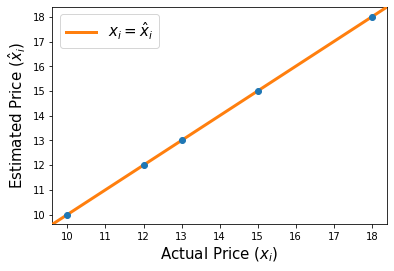

In [13]:
# plot comparison of actual and estimated prices
plt.plot(x,xhat,'o',zorder=4,label="_data")
xx,yy = plt.xlim(),plt.ylim()
plt.plot(xx,xx,zorder=3,label="$x_i=\\hat{x}_i$",linewidth=3)
plt.legend(fontsize=15)
plt.xlim(xx)
plt.ylim(yy)
plt.xlabel("Actual Price ($x_i$)",fontsize=15)
plt.ylabel("Estimated Price ($\\hat{x}_i$)",fontsize=15);

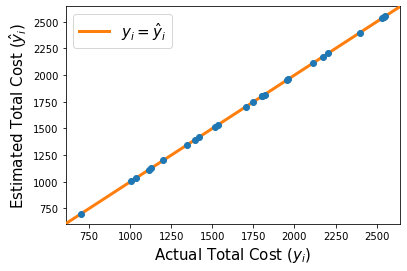

In [14]:
# plot comparison of actual and estimated total costs
plt.plot(y,yhat,'o',zorder=4,label="_data")
xx,yy = plt.xlim(),plt.ylim()
plt.plot(xx,xx,zorder=3,label="$y_i=\\hat{y}_i$",linewidth=3)
plt.legend(fontsize=15)
plt.xlim(xx)
plt.ylim(yy)
plt.xlabel("Actual Total Cost ($y_i$)",fontsize=15)
plt.ylabel("Estimated Total Cost ($\\hat{y}_i$)",fontsize=15);

In [15]:
# Another option is to use the sklearn Python package
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

from sklearn.linear_model import LinearRegression

# Create a Linear Regression object
ols = LinearRegression(fit_intercept=False)
# fit the linear regression to our data
ols.fit(M,y)

# get estimated costs
xhat = np.round(ols.coef_,decimals=10)
# get estimated total costs
yhat = ols.predict(M)

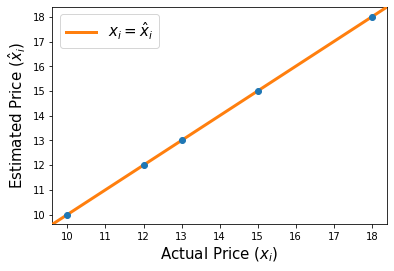

In [16]:
# plot comparison of actual and estimated prices
plt.plot(x,xhat,'o',zorder=4,label="_data")
xx,yy = plt.xlim(),plt.ylim()
plt.plot(xx,xx,zorder=3,label="$x_i=\\hat{x}_i$",linewidth=3)
plt.legend(fontsize=15)
plt.xlim(xx)
plt.ylim(yy)
plt.xlabel("Actual Price ($x_i$)",fontsize=15)
plt.ylabel("Estimated Price ($\\hat{x}_i$)",fontsize=15);

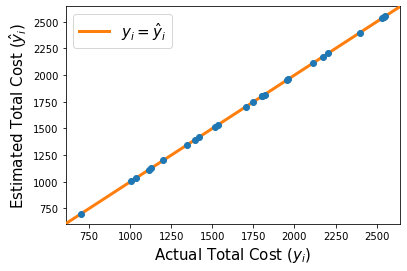

In [17]:
# plot comparison of actual and estimated total costs
plt.plot(y,yhat,'o',zorder=4,label="_data")
xx,yy = plt.xlim(),plt.ylim()
plt.plot(xx,xx,zorder=3,label="$y_i=\\hat{y}_i$",linewidth=3)
plt.legend(fontsize=15)
plt.xlim(xx)
plt.ylim(yy)
plt.xlabel("Actual Total Cost ($y_i$)",fontsize=15)
plt.ylabel("Estimated Total Cost ($\\hat{y}_i$)",fontsize=15);

# Solving Linear Systems Probabilistically with OLS

As before, consider an **overdetermined** system with more equations than unknown variables

$
M = \begin{bmatrix}
    m_{11} & m_{12} & \cdots & m_{1p} \\
    m_{21} & m_{22} & \cdots & m_{2p} \\
    \vdots & \vdots & \ddots & \vdots \\
    m_{n1} & m_{n2} & \cdots & m_{np} \\
\end{bmatrix},
\hspace{1cm}
\vec{x} = \begin{bmatrix}
    x_1 \\ x_2 \\ \vdots \\ x_p
\end{bmatrix},
\hspace{1cm}
\color{blue}{
\vec{y} = \begin{bmatrix}
    y_1 \\ y_2 \\ \vdots \\ y_n
\end{bmatrix}},
$

such that $\hspace{1cm}M\cdot\vec{x}\approx\color{blue}{\vec{y}}\hspace{1cm}$ and $n>p$.

As before, we can think about $\vec{x}$ as prices for $p$ different grocery items, $M$ as the purchases of $n$ individuals, and $\color{blue}{\vec{y}}$ as the total costs for each individual.

Unlike before, $M$ is a **data set** of purchasing behaviors across individuals <font color="red">which includes real-world randomness and variation.</font>

We will find a probabilistic solution for $\vec{x}$.

Unlike before, we expect that $x_1,\,x_2,\,\cdots,\,x_p$ will represent some average prices.

Specifically, we want to estimate prices $\hat{x}$ such that our estimated total costs $M\cdot\hat{x}=\color{red}{\hat{y}}$ are as close to the true $\color{blue}{\vec{y}}$ as possible.

That is, we want to minimize the **norm of the difference vector**: $\hspace{1cm}||\color{blue}{\vec{y}}-\color{red}{\hat{y}}||=\sqrt{\sum_{i=1}^n \left(\color{blue}{y_i}-\color{red}{\hat{y}_i}\right)^2}$


The overarching strategy is called **ordinary least squares (OLS) regression**.

Instead of $\hspace{1cm}M\vec{x}\approx\color{blue}{\vec{y}}$

we multiply both sides of the equation by $M^T$ and solve the following for $\color{red}{\hat{x}}$

$
\left(M^TM\right)\vec{x} \approx M^T\color{blue}{\vec{y}}
\hspace{1cm}\Rightarrow\hspace{1cm}
\color{red}{\hat{x}} \approx \left(M^TM\right)^{-1}\cdot M^T\vec{y}
$

The solution we get will be an **estimate** $\color{red}{\hat{x}}$ for the true vector $\vec{x}$. The components $\color{red}{\hat{x}_i}$ of $\color{red}{\hat{x}}$ are called **coefficients**.

We then see how well our estimate performs by calculating an estimate of $\color{blue}{\vec{y}}$ using $\color{red}{\hat{x}}$ according to 
$
\hspace{1cm}
M\color{red}{\hat{x}}=\color{red}{\hat{y}}
$

And we measure our performance using $\,||\color{blue}{\vec{y}}-\color{red}{\hat{y}}||$

Note that the end result may not perfectly reproduce $\color{blue}{\vec{y}}$ and our estimate $\color{red}{\hat{x}}$ is only an approximation of the true $\vec{x}$.

How good is our estimate $\hat{x}$? 

There are a few options for assessing this question. 

As mentioned, we can compare $\,M\hat{x}=\hat{y}\,$ to the true $\vec{y}$ using 
$
\hspace{1cm}
||\vec{y}-\hat{y}|| = \sum_{i=1}^n \left(y_i-\hat{y}_i\right)^2
$

Another common option is to calculate the **coefficient of determination** $\hspace{1cm} R^2 = \frac{\sum_{i=1}^n \left(\hat{y}_i-\bar{y}\right)^2}{\sum_{i=1}^n \left(y_i-\bar{y}\right)^2}\hspace{1cm}$
where $\bar{y}$ is the average value of $\vec{y}$.

You can treate $R^2$ as the variance in $\vec{y}$ that is "explained" by $\hat{y}$.

$R^2$ ranges from 0 to 1 where $R^2=1$ indicates that all of the variation in $\vec{y}$ is recovered in $\hat{y}$.

We will discuss this measure more later, but $R^2=1$ means that there exists $m,\,b$ such that $\hspace{1cm}\vec{y}=m\cdot\hat{y}+b$

What do these calculation say about the ability of our approach to explain the purchases of each of the $n$ individuals?

Each term in 
$
\hspace{1cm}
\sum_{i=1}^n \left(y_i-\hat{y}_i\right)^2
\hspace{1cm}
$
corresponds to one of the $n$ individuals (i.e., each row of $M$).

The difference between the estimated total cost $\,\hat{y}_i\,$ and the actual total cost $\,y_i\,$ is called the **$i$th residual**. 

If we plot the total cost data $\left(1,y_1\right),\,\left(2,y_2\right),\,\dots,\,\left(n,y_n\right)\,$ compared to the estimated total costs $\left(1,\hat{y}_1\right),\,\left(2,\hat{y}_2\right),\,\dots,\,\left(n,\hat{y}_n\right)\,$ then the $i$th residual is the vertical distance between points.

In this example, we consider 9 grocery items and the purchasing information of 450 individuals who potentially shopped at different stores for the same grocery items. Therefore, the price for a specific grocery item may vary across individuals

Matrix $M$ is $450\times9$ and represents individuals purchasing data. 

Use the slider to change the variability in the prices for the same grocery items across individuals, but $M$ remains unchanged. 

We attempt to estimate the prices $\hat{x}$ and use these estimates to recalculate individuals' total cost $\hat{y}$ which we compare to their acutal total costs $\vec{y}$.

In [18]:
from scipy.stats import pearsonr
# generate true data
x = np.array([1,4,20,5,3,6,3,7,2])
# number of grocery item prices (one price per item)
p = len(x)
# number of individuals with purchasing data (here just want n > p)
n = 50*p
x = np.tile(x,(n,1))
M = np.random.randint(0,15,(n,p))
# precalculate stuff for widget
MT = M.T
G = MT@M
y = np.sum(M*x,axis=1)
# # generate noise to be added to the prices (x)
# # Here, the noise represents variation in prices for the same grocery item across different stores.
# # Prices are normally distributed about some average price.
noise = np.random.normal(size=x.shape)

def plotResiduals(priceVariation=0):
    noisyx = x+priceVariation*noise
    ynoisy = np.sum(M*noisyx,axis=1)
    y2 = MT@ynoisy
    xhat = np.linalg.solve(G,y2)
    yhat = M@xhat
    
    # plot outcomes
#     plt.figure(figsize=(12,6));
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,figsize=(14,8));
    n2 = np.min([10,n])
    for i in range(n2):
        ax1.plot([i+1,i+1],[y[i],yhat[i]],'k-',label="_residual")
    
    a = np.arange(n2)+1
    ax1.plot(a,y[:n2],'o',label="Actual Cost ($y_i$)",markersize=8)
    ax1.plot(a,yhat[:n2],'^',label="Estimated Cost ($\\hat{y}_i$)",markersize=8)
    ax1.set_ylim((-500,1000))
    xx,yy = ax1.get_xlim(),ax1.get_ylim()
    ax1.plot([0,0],[1,2],"k-",label="Residual",linewidth=3)
    ax1.set_xlim(xx)
    ax1.set_ylim(yy)
    ax1.legend(fontsize=15,ncol=2,loc="lower left")
    ax1.set_xticks(list(map(int,a)))
    ax1.set_xlabel("Individual ($i$)",fontsize=15)
    ax1.set_yticklabels(ax1.get_yticks(),fontsize=15)
    ax1.set_ylabel("Total Cost ($)",fontsize=15)

    
    ax2.plot(y,yhat,'o',zorder=4,label="_data")
    r,p = pearsonr(y,yhat)
    xx,yy = ax2.get_xlim(),ax2.get_ylim()
    ax2.plot(xx,xx,'-',zorder=3,label="$\\hat{y}_i = y_i$",linewidth=3)
    ax2.set_title("$R^2=%0.2f$" % (r**2),fontsize=15)
    ax2.set_xlim(xx)
    ax2.set_ylim(yy)
    ax2.set_xlabel("Actual Total Cost ($y_i$)",fontsize=15)
    ax2.set_ylabel("Estimated Total Cost ($\\hat{y}_i$)",fontsize=15)
    ax2.legend(fontsize=12)
    
    C = ['r','b','g']
    for i in range(3):
        counts,bins = np.histogram(noisyx[:,i],bins=20)
        ax3.plot(bins[:-1],counts,'-o',label="grocery %d" % (i+1),color=C[i])
    yy = ax3.get_ylim()[1]
    for i in range(3):
        ax3.plot([xhat[i],xhat[i]],[0,yy],'--',color=C[i],label="_xhat",linewidth=3)
    ax3.plot([0,0],[-1,-2],'k--',label="Estmated Cost ($\\hat{x}_i$)")
    ax3.set_ylim((0,yy))
    ax3.legend(fontsize=12)
    ax3.set_xlabel("Observed Grocery Item Price ($)",fontsize=15)
    ax3.set_ylabel("Number of Observations",fontsize=15)
    ax3.set_yticklabels(ax2.get_yticks(),fontsize=15)
    
    ax4.plot(x[0,:],xhat,'o',zorder=4,label="_data")
    xx,yy = ax4.get_xlim(),ax4.get_ylim()
    ax4.plot(xx,xx,'-',zorder=3,label="$\\hat{x}_i = x_i$",linewidth=3)
    ax4.set_xlim(xx)
    ax4.set_ylim(yy)
    ax4.set_xlabel("Actual Grocery Price ($x_i$)",fontsize=15)
    ax4.set_ylabel("Estimated Grocery Price ($\\hat{x}_i$)",fontsize=15)
    ax4.legend(fontsize=12)
    
    
    plt.tight_layout();
    return None

widgets.interact(plotResiduals,priceVariation=(0,50,1));

interactive(children=(IntSlider(value=0, description='priceVariation', max=50), Output()), _dom_classes=('widg…

# Fitting Linear Equations to Data

Our approach to solving overdetermined linear systems can be used to describe data.

Imagine the following data

$\begin{array}{c|c} \hline x & y \\  \hline 1 & 7\\2 & 11\\3 & 15\\4 & 19\\5 & 23\end{array}$

If we assume that $x$ and $y$ are **linearly related**, then there exists coefficients $\beta_0$ and $\beta_1$ such that 
$
\quad
y = \beta_0 + \beta_1\cdot x
$

Can we determine $\beta_0,\, \beta_1$?

In [19]:
x = np.arange(5)+1
y = 3+4*x
d = sympy.Matrix(np.vstack((x,y)).T)
print(sympy.latex(d))

\left[\begin{matrix}1 & 7\\2 & 11\\3 & 15\\4 & 19\\5 & 23\end{matrix}\right]


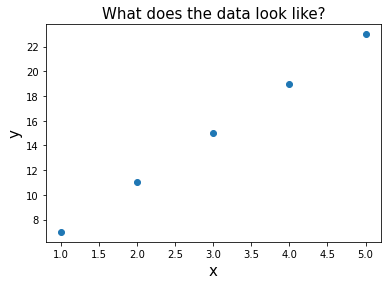

In [20]:
plt.plot(x,y,'o')
plt.xlabel("x",fontsize=15)
plt.ylabel("y",fontsize=15);
plt.title("What does the data look like?",fontsize=15);

Starting with 
$
\quad
y = \beta_0 + \beta_1\cdot x
\quad
$
instead consider 
$
\quad
y = \beta_0\cdot \color{red}{1} + \beta_1\cdot x
$

This is a small change and, of course, the two equations are equivalent.

But, written this way we see that our problem can also be written as

$
M\vec{\beta} = 
\begin{bmatrix} 
x_1 & 1 \\
x_2 & 1 \\
\vdots & \vdots \\ 
x_n & 1 \\
\end{bmatrix} 
\cdot 
\begin{bmatrix}
\beta_1 \\ 
\beta_0 \\
\end{bmatrix}
= \vec{y}
$

This is an overdetermined system of linear equations. We know how to solve this!

As before, we use $M^T$ and solve 

$
\begin{bmatrix} \beta_1 \\ \beta_0 \\ \end{bmatrix}
=
\left(
\begin{bmatrix}
x1 & x2 & \cdots & x_n \\
1 & 1 & \cdots & 1 \\
\end{bmatrix}
\begin{bmatrix} 
x_1 & 1 \\
x_2 & 1 \\
\vdots & \vdots \\ 
x_n & 1 \\
\end{bmatrix} 
\right)^{-1}
\begin{bmatrix}
x1 & x2 & \cdots & x_n \\
1 & 1 & \cdots & 1 \\
\end{bmatrix}
\vec{y}
$

In [21]:
# our data
x = np.arange(5)+1
y = np.array([7,11,15,19,23])

# create the matrix containing the data
M = np.vstack((x,np.ones(len(x)))).T
M

array([[1., 1.],
       [2., 1.],
       [3., 1.],
       [4., 1.],
       [5., 1.]])

In [22]:
# use the transpose of M to solve the system of linear equations
G = M.T@M
yy = M.T@y
b = np.linalg.solve(G,yy)
b

array([4., 3.])

Our solution is $\beta_0=3$ and $\beta_1=4$ so that $\quad y = 3 + 4x$

In [23]:
# Let's test our solution
yhat = M@b
print(yhat)
print(y)

[ 7. 11. 15. 19. 23.]
[ 7 11 15 19 23]


In this first case, $y$ and $x$ were **perfectly** linearly related. The linear equation yielded an exact solution. The scatter plot relating $x$ and $y$ hinted at this visually.

But what if $x$ and $y$ are **imperfectly** linearly related?

Consider the following scatter plot for a new data set of $x$ and $y$.

In [24]:
x2 = np.arange(10)+1
n2 = len(x2)
e2 = 5
y2 = 3 + 4*x2 +e2*np.random.normal(size=n2)

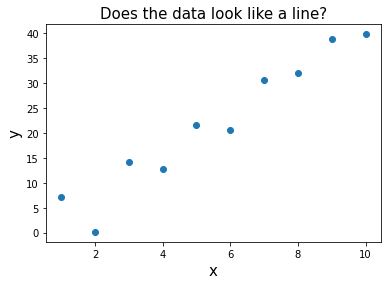

In [25]:
plt.plot(x2,y2,'o')
plt.xlabel("x",fontsize=15)
plt.ylabel("y",fontsize=15);
plt.title("Does the data look like a line?",fontsize=15);

There is no straight line that intersects all of the points, but, still, perhaps there is a straight line that captures the general relationship between $x$ and $y$.

This line is called the **line of best fit**.

The **line of best fit** is the "best" line in that it minimizes the sum of the residuals between the data points and the line.

In [26]:
def lineWidget(b0=1,b1=1):
    x,y = x2,y2
    plt.plot(x,y,'o',label="Data",zorder=4)
    plt.xlabel("x",fontsize=15)
    plt.ylabel("y",fontsize=15);
    xx = np.array(plt.xlim())
    yy = plt.ylim()
    z = b0 + b1*x
#     R = pearsonr(y,z)[0]**2
    R = np.sum(np.abs(y-z))
    plt.title("Try to minimize $|y-\\hat{y}|=%0.1f$" % R,fontsize=15)
    for i in range(len(x)):
        plt.plot([x[i],x[i]],[y[i],z[i]],'k-',zorder=3,label="_residual")
    zz = b0 + b1*xx
    plt.plot(xx,zz,'r-',label="$\\beta_0+\\beta_1 x$",zorder=5)
    plt.plot([-10,-5],[0,0],'k-',label="Residual")
    plt.xlim(xx)
    plt.ylim(yy)
    plt.legend(loc="lower right",fontsize=12)
    plt.xlabel("x",fontsize=15)
    plt.ylabel("y",fontsize=15)
    
    
widgets.interact(lineWidget,b0=(0,5,.2),b1=(0,5,.2));

interactive(children=(FloatSlider(value=1.0, description='b0', max=5.0, step=0.2), FloatSlider(value=1.0, desc…

We approach this problem the exact same way as before and solve

$
\begin{bmatrix} \beta_1 \\ \beta_0 \\ \end{bmatrix}
=
\left(
\begin{bmatrix}
x_1 & x_2 & \cdots & x_n \\
1 & 1 & \cdots & 1 \\
\end{bmatrix}
\begin{bmatrix} 
x_1 & 1 \\
x_2 & 1 \\
\vdots & \vdots \\ 
x_n & 1 \\
\end{bmatrix} 
\right)^{-1}
\begin{bmatrix}
x_1 & x_2 & \cdots & x_n \\
1 & 1 & \cdots & 1 \\
\end{bmatrix}
\vec{y}
$

but, in this case, our solution for $\hat{y} = \beta_0 + \beta_1x$ will only approximate $\vec{y}$.

However, this approximation will be the "best" in that it minimizes the residuals.

For this data, the best coefficients are actually the same as the original problem: $\quad \beta_0=3,\,\beta_1=4$.

In [27]:
def lineWidget(b0=1,b1=1):
    x,y = x2,y2
    plt.plot(x,y,'o',label="Data",zorder=4)
    plt.xlabel("x",fontsize=15)
    plt.ylabel("y",fontsize=15);
    xx = np.array(plt.xlim())
    yy = plt.ylim()
    z = b0 + b1*x
#     R = pearsonr(y,z)[0]**2
    R = np.sum(np.abs(y-z))
    plt.title("Try to minimize $|y-\\hat{y}|=%0.1f$" % R,fontsize=15)
    for i in range(len(x)):
        plt.plot([x[i],x[i]],[y[i],z[i]],'k-',zorder=3,label="_residual")
    zz = b0 + b1*xx
    plt.plot(xx,zz,'r-',label="$\\beta_0+\\beta_1 x$",zorder=5)
    plt.plot([-10,-5],[0,0],'k-',label="Residual")
    plt.xlim(xx)
    plt.ylim(yy)
    plt.legend(loc="lower right",fontsize=12)
    plt.xlabel("x",fontsize=15)
    plt.ylabel("y",fontsize=15)
    
    
widgets.interact(lineWidget,b0=(0,5,.2),b1=(0,5,.2));

interactive(children=(FloatSlider(value=1.0, description='b0', max=5.0, step=0.2), FloatSlider(value=1.0, desc…

Given a data set containing $x$ and $y$, a similar approach can find **best fit** approximations assuming other functional forms that minimize the residuals between the data and the approximation.

Instead of fitting a straight line to $x$ and $y$, we can assume that the variables are related by any polynomial:

$
\quad
y = \displaystyle\sum_{i=1}^n \beta_i\cdot x^i
$

For example, let's consider some new data and assume the following relationship
$
\quad
y = \beta_2\cdot x^2 + \beta_1\cdot x + \beta_0
\quad
$

In [28]:
x3 = np.arange(15)
y3 = 2*x3**2 + 3*x3 + 1

In [29]:
def quadWidget(b0=1,b1=1,b2=1):
    x2,y2 = x3,y3
    plt.plot(x2,y2,'o',label="Data",zorder=4)
    plt.xlabel("x",fontsize=15)
    plt.ylabel("y",fontsize=15);
    xx = np.array(plt.xlim())
    yy = plt.ylim()
    z = b0 + b1*x2 + b2*x2**2
#     R = pearsonr(y,z)[0]**2
    R = np.sum(np.abs(y2-z))
    plt.title("Try to minimize $|y-\\hat{y}|=%0.1f$" % R,fontsize=15)
    for i in range(len(x)):
        plt.plot([x2[i],x2[i]],[y2[i],z[i]],'k-',zorder=3,label="_residual")
    plt.plot(x2,z,'r-',label="$\\beta_0+\\beta_1 x + \\beta_2 x^2$",zorder=5)
    plt.plot([-10,-5],[0,0],'k-',label="Residual")
    plt.xlim(xx)
    plt.ylim(yy)
    plt.legend(loc="lower right",fontsize=12)
    plt.xlabel("x",fontsize=15)
    plt.ylabel("y",fontsize=15)
    
    
widgets.interact(quadWidget,b0=(0,5,.2),b1=(0,5,.2),b2=(0,5,.2));

interactive(children=(FloatSlider(value=1.0, description='b0', max=5.0, step=0.2), FloatSlider(value=1.0, desc…

We change our previous approach by adding a column to $M$ for each order of the polynomial and we add a corresponding coefficient to $\vec{\beta}$.

$
M\vec{\beta} = 
\begin{bmatrix} 
x_1^2 & x_1 & 1 \\
x_2^2 & x_2 & 1 \\
\vdots & \vdots & \vdots \\ 
x_n^2 & x_n & 1 \\
\end{bmatrix} 
\cdot 
\begin{bmatrix}
\beta_2 \\
\beta_1 \\ 
\beta_0 \\
\end{bmatrix}
= \vec{y}
$

and, just as before, we use $M^T$ to solve the overdetermined system using $\left(M^TM\right)^{-1}$:

$
\begin{bmatrix} \beta_2 \\ \beta_1 \\ \beta_0 \\ \end{bmatrix}
=
\left(
\begin{bmatrix}
x_1^2 & x_2^2 & \cdots & x_n^2 \\
x_1 & x_2 & \cdots & x_n \\
1 & 1 & \cdots & 1 \\
\end{bmatrix}
\begin{bmatrix} 
x_1^2 & x_1 & 1 \\
x_2^2 & x_2 & 1 \\
\vdots & \vdots & \vdots \\ 
x_n^2 & x_n & 1 \\
\end{bmatrix} 
\right)^{-1}
\begin{bmatrix}
x_1^2 & x_2^2 & \cdots & x_n^2 \\
x_1 & x_2 & \cdots & x_n \\
1 & 1 & \cdots & 1 \\
\end{bmatrix}
\vec{y}
$

In this case, we get $\vec{\beta} = \begin{bmatrix} 2 \\ 3 \\ 1 \\ \end{bmatrix}$.

In [30]:
widgets.interact(quadWidget,b0=(0,5,.2),b1=(0,5,.2),b2=(0,5,.2));

interactive(children=(FloatSlider(value=1.0, description='b0', max=5.0, step=0.2), FloatSlider(value=1.0, desc…

# Regression Example: Home sales and amenities

Data from the Kaggle Machine Learning Challenge (https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview).

Here we will analyze a real world data set of home features and the home's sales price ($\vec{y}$).

Each of $n$ homes and their $p$ features will be represented by an $n\times p$ matrix $M$. This matrix is our data set.

The goal is to predict the sales price of each house from its features which requires that we estimate the dollar value of each home feature ($\vec{x}$).

In [31]:
# import that Pandas Python package for working with dataframes
import pandas as pd

# read in housing price data as a dataframe
data = pd.read_csv("./kaggleHousingPrices/train.csv")
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [32]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [33]:
# summary statistics of each column
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [34]:
# Access specific column
# Each column is like a Numpy array 
# and can be thought of as a vector.
data["LotArea"]

0        8450
1        9600
2       11250
3        9550
4       14260
        ...  
1455     7917
1456    13175
1457     9042
1458     9717
1459     9937
Name: LotArea, Length: 1460, dtype: int64

<AxesSubplot:>

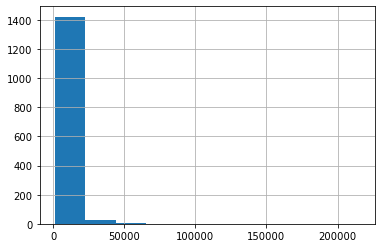

In [35]:
# visualize a column
data["LotArea"].hist()

In [36]:
# dataframes are matrices underneath
M = data.values
print(M.shape)
M

(1460, 81)


array([[1, 60, 'RL', ..., 'WD', 'Normal', 208500],
       [2, 20, 'RL', ..., 'WD', 'Normal', 181500],
       [3, 60, 'RL', ..., 'WD', 'Normal', 223500],
       ...,
       [1458, 70, 'RL', ..., 'WD', 'Normal', 266500],
       [1459, 20, 'RL', ..., 'WD', 'Normal', 142125],
       [1460, 20, 'RL', ..., 'WD', 'Normal', 147500]], dtype=object)

Fields of interest:
- LotFrontage: Linear feet of street connected to property
- LotArea: Lot size in square feet
- OverallQual: Rates the overall material and finish of the house (1 to 10)
- OverallCond: Rates the overall condition of the house (1 to 10)
- GarageArea: Size of garage in square feet
- PoolArea: Pool area in square feet
- GrLivArea: Above grade (ground) living area square feet
- BedroomAbvGr: Number of bedrooms above basement level

In [37]:
# Dataframe columns can contain any data type.
# Filter dataframe to numerical columns of interest.
data = pd.read_csv("./kaggleHousingPrices/train.csv")
data = data[["SalePrice","LotArea","GarageArea","PoolArea","GrLivArea","BedroomAbvGr"]]
data.head()

,SalePrice,LotArea,GarageArea,PoolArea,GrLivArea,BedroomAbvGr
0,208500,8450,548,0,1710,3
1,181500,9600,460,0,1262,3
2,223500,11250,608,0,1786,3
3,140000,9550,642,0,1717,3
4,250000,14260,836,0,2198,4


In [38]:
# get matrix M and sale price vector y
y = data["SalePrice"]
M = data[["LotArea","GarageArea","PoolArea","BedroomAbvGr"]]
n,p = M.shape
# number of observations (home sales), number of home features 
print((n,p))
M.describe() 

(1460, 4)


,LotArea,GarageArea,PoolArea,BedroomAbvGr
count,1460.000000,1460.000000,1460.000000,1460.000000
mean,10516.828082,472.980137,2.758904,2.866438
std,9981.264932,213.804841,40.177307,0.815778
min,1300.000000,0.000000,0.000000,0.000000
25%,7553.500000,334.500000,0.000000,2.000000
50%,9478.500000,480.000000,0.000000,3.000000
75%,11601.500000,576.000000,0.000000,3.000000
max,215245.000000,1418.000000,738.000000,8.000000


In [39]:
# attempt to solve for feature values, but expect error because M is not square
xhat = np.linalg.solve(M,y)

LinAlgError: Last 2 dimensions of the array must be square

In [40]:
# use M transpose approach
xhat = np.linalg.solve(M.T@M,M.T@y)
yhat = M@xhat

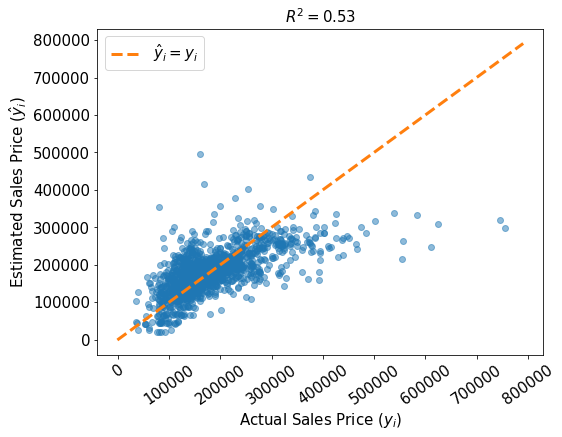

In [41]:
# did we do a good job?
plt.figure(figsize=(8,6))
plt.plot(y,yhat,'o',alpha=.5,label="_data",zorder=3)
xx,yy = plt.xlim(),plt.ylim()
plt.plot(xx,xx,'--',zorder=4,label="$\\hat{y}_i = y_i$",linewidth=3)
plt.xticks(fontsize=15,rotation=35)
plt.yticks(fontsize=15)
plt.xlabel("Actual Sales Price ($y_i$)",fontsize=15)
plt.ylabel("Estimated Sales Price ($\hat{y}_i$)",fontsize=15)

ybar = y.mean()
R2 = np.sum((yhat-ybar)**2) / np.sum((y-ybar)**2)
plt.title("$R^2=%0.2f$" % R2,fontsize=15);
plt.legend(fontsize=15);

Remember we are essentially solving $\hspace{1cm}M\cdot\vec{x}=\vec{y}\hspace{1cm}$ which, in a real-world setting is equivalent to

$
\begin{align}
    \$cost_1 &= \$price_{11}\cdot amount_{11}+ \$price_{12}\cdot amount_{12}+\dots+ \$price_{1p}\cdot amount_{1p} \\
    \$cost_2 &= \$price_{21}\cdot amount_{21}+ \$price_{22}\cdot amount_{22}+\dots+ \$price_{2p}\cdot amount_{2p} \\
    \vdots &= \hspace{3cm}\vdots \\
    \$cost_n &= \$price_{n1}\cdot amount_{n1}+ \$price_{n2}\cdot amount_{n2}+\dots+ \$price_{np}\cdot amount_{np} \\
\end{align}
$

Let $\hat{\$price}_j = \langle \$price_{ji}\rangle_i$ be the average price for grocery item $j$.

Then our estimated price vector $\hspace{1cm}\hat{x}=\begin{bmatrix}\hat{\$price}_1 \\ \hat{\$price}_2 \\ \vdots \\ \hat{\$price}_p \\ \end{bmatrix}\hspace{1cm}$ has components with units in dollars. 

That is, $\hat{\$price}_i$ is the estimated increase in the home sale price if $amenity_i$ is increased by 1 unit of measure (e.g., the Lot Size is increased by 1 square meter).

In [42]:
# summarize the amenity cost estimates as a Pandas Series object
xhat1_series = pd.Series(
    data = xhat,
    index = M.columns,
).sort_values()
xhat1_series

LotArea             1.190920
PoolArea           59.027950
GarageArea        236.762178
BedroomAbvGr    18931.625535
dtype: float64

Estimating the value added of each homer amenity is very valuable.

However, estimating these prices confidently is very tricky.

Let's see what happens if I add in more home amenities.

In [45]:
data = pd.read_csv("./kaggleHousingPrices/train.csv")

# get matrix M and sale price vector y
y = data["SalePrice"]

# originally  M = data[["LotArea","GarageArea","PoolArea","BedroomAbvGr"]]
M = data[["LotArea","GarageArea","PoolArea","GrLivArea","BedroomAbvGr","OverallCond","OverallQual",]]
n,p = M.shape
# number of observations (home sales), number of home features 
print((n,p))

# use M transpose approach
xhat = np.linalg.solve(M.T@M,M.T@y)
yhat = M@xhat

(1460, 7)


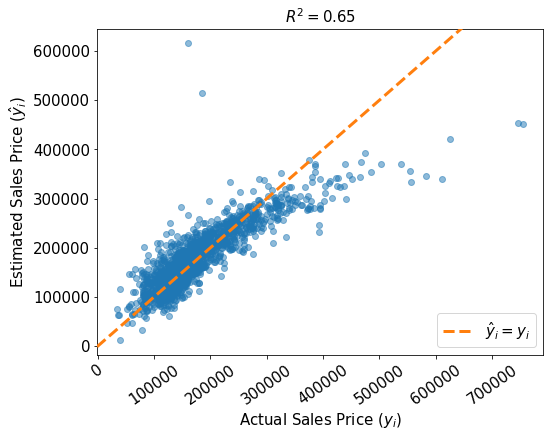

In [46]:
# did we do a good job?
plt.figure(figsize=(8,6))
plt.plot(y,yhat,'o',alpha=.5,label="_data",zorder=3)
xx,yy = plt.xlim(),plt.ylim()
plt.plot(xx,xx,'--',zorder=4,label="$\\hat{y}_i = y_i$",linewidth=3)
plt.xlim(xx)
plt.ylim(yy)
plt.xticks(fontsize=15,rotation=35)
plt.yticks(fontsize=15)
plt.xlabel("Actual Sales Price ($y_i$)",fontsize=15)
plt.ylabel("Estimated Sales Price ($\hat{y}_i$)",fontsize=15)

ybar = y.mean()
R2 = np.sum((yhat-ybar)**2) / np.sum((y-ybar)**2)
plt.title("$R^2=%0.2f$" % R2,fontsize=15);
plt.legend(fontsize=15);

In [47]:
# summarize the amenity cost estimates as a Pandas Series object
pd.Series(
    data = xhat,
    index = M.columns,
).sort_values()

BedroomAbvGr   -17117.597699
OverallCond     -5463.293108
PoolArea          -18.799606
LotArea             0.681247
GarageArea         59.607438
GrLivArea          64.353832
OverallQual     21165.914665
dtype: float64

In [48]:
# result from before
xhat1_series

LotArea             1.190920
PoolArea           59.027950
GarageArea        236.762178
BedroomAbvGr    18931.625535
dtype: float64

The amenity value estimates are completely different! 

We will discuss why this happens in a later module.

For now, it's just something to be aware of.